<a href="https://colab.research.google.com/github/yleng204/Lhy_Machine_Learning/blob/main/31_08_2021_Multilingual_BERT_AIjudge_with_XLM_Roberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

     |████████████████████████████████| 264 kB 4.9 MB/s 
     |████████████████████████████████| 119 kB 56.3 MB/s 
     |████████████████████████████████| 243 kB 58.2 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 


In [2]:
from datasets import load_dataset

dataset = load_dataset("ecthr_cases")

Downloading:   0%|          | 0.00/2.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

No config specified, defaulting to: ecthr_cases/alleged-violation-prediction


Downloading:   0%|          | 0.00/32.8M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset ecthr_cases downloaded and prepared to /root/.cache/huggingface/datasets/ecthr_cases/alleged-violation-prediction/1.1.0/8922a012792758e64921d4a66d42adf759e42838aae54a6a8871607f6399aecf. Subsequent calls will reuse this data.


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['facts', 'labels', 'silver_rationales', 'gold_rationales'],
        num_rows: 9000
    })
    test: Dataset({
        features: ['facts', 'labels', 'silver_rationales', 'gold_rationales'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['facts', 'labels', 'silver_rationales', 'gold_rationales'],
        num_rows: 1000
    })
})

In [4]:
dataset_train = dataset['train']
dataset_validation = dataset['validation']
dataset_test = dataset['test']

In [5]:
!pip install Sentencepiece
!pip install transformers
import torch

     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 2.8 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 53.2 MB/s 
     |████████████████████████████████| 636 kB 70.5 MB/s 
     |████████████████████████████████| 3.3 MB 70.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
from transformers import XLMRobertaTokenizer

# Download the tokenizer for the XLM-Robert `base` model.
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

In [7]:
train_labels = dataset['train']['labels']
validation_labels = dataset['validation']['labels']
test_labels = dataset['test']['labels']

In [8]:
train_facts = dataset['train']['facts']
validation_facts = dataset['validation']['facts']
test_facts = dataset['test']['facts']

In [9]:
print(len(train_labels))
print(len(validation_labels))
print(len(test_labels))

9000
1000
1000


In [10]:
print(len(train_facts))
print(len(validation_facts))
print(len(test_facts))

9000
1000
1000


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# 保存
import numpy as np
#labels_a = np.array(list(all_labels_set))
#np.save('/content/drive/MyDrive/Data/AIjudge/a.npy',labels_a)   # 保存为.npy格式
# 读取


In [13]:
a=np.load('/content/drive/MyDrive/Data/AIjudge/a.npy')
a=a.tolist()
a

['10',
 '13',
 'P1-3',
 '38',
 '34',
 'P7-5',
 'P4-4',
 'P12-1',
 '2',
 'P4-2',
 '5',
 '6',
 'P7-3',
 'P7-1',
 '12',
 'P6-3',
 '8',
 'P7-4',
 '7',
 '3',
 '17',
 '18',
 '15',
 'P1-2',
 'P3-1',
 '14',
 'P7-2',
 'P1-1',
 '11',
 '9',
 '39',
 '4',
 '46']

In [14]:
numbers_sorted = sorted(a)
numbers_sorted

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '17',
 '18',
 '2',
 '3',
 '34',
 '38',
 '39',
 '4',
 '46',
 '5',
 '6',
 '7',
 '8',
 '9',
 'P1-1',
 'P1-2',
 'P1-3',
 'P12-1',
 'P3-1',
 'P4-2',
 'P4-4',
 'P6-3',
 'P7-1',
 'P7-2',
 'P7-3',
 'P7-4',
 'P7-5']

In [15]:
len(numbers_sorted)

33

In [16]:
import pandas as pd
# initialise data of lists.
train_data = {'Fact':train_facts,'Label':train_labels} 
# Create DataFrame
train_df = pd.DataFrame(train_data) 
# Print the output.
train_df

,Fact,Label
0,[11. At the beginning of the events relevant ...,"[13, 8]"
1,[9. The applicant is the monarch of Liechtens...,"[14, P1-1, 6]"
2,[9. In June 1949 plots of agricultural land o...,[6]
3,"[8. In 1991 Mr Dušan Slobodník, a research wo...","[14, 10, 9]"
4,"[9. The applicant is an Italian citizen, born...","[14, 6]"
...,...,...
8995,[5. The applicant was born in 1960 and lives ...,"[6, 8]"
8996,[5. The applicant was born in 1946 and is cur...,[4]
8997,"[5. The applicants are Russian nationals who,...","[5, 13, 2, 3]"
8998,[8. In all cases the applicants brought civil...,"[P1-1, 6]"


In [17]:
validation_data = {'Fact':validation_facts,'Label':validation_labels} 
# Create DataFrame
validation_df = pd.DataFrame(validation_data) 
# Print the output.
validation_df

,Fact,Label
0,[5. The applicant was born in 1983 and is det...,[8]
1,[5. The applicant was born in 1982 and is cur...,[3]
2,[5. The applicant was born in 1955 and lives ...,"[3, 6]"
3,[6. The applicant was born in 1977 and lives ...,[7]
4,[6. The applicants were born in 1983 and 2007...,"[11, 5, 6, 8]"
...,...,...
995,[5. The applicant was born in 1965 and lives ...,[11]
996,[4. The applicant was born in 1954 and lives ...,[6]
997,[5. The applicant company was a Ukrainian joi...,"[46, 6]"
998,[5. The applicant was born in 1985 and lives ...,[5]


In [18]:
test_data = {'Fact':test_facts,'Label':test_labels} 
# Create DataFrame
test_df = pd.DataFrame(test_data) 
# Print the output.
test_df

,Fact,Label
0,"[5. The applicant is a journalist for DN.no, ...",[10]
1,[5. The applicant was born in 1940 and lives ...,"[13, 8]"
2,[5. The applicant was born in 1965 and lives ...,[6]
3,[5. The applicant was born in 1967 and lives ...,[6]
4,[5. The applicant was born in 1967 and lives ...,"[13, 3, 6]"
...,...,...
995,[5. The applicants were born in 1971 and 1976...,"[10, 6]"
996,"[5. The applicant, who was born in 1948, live...","[10, 5, 13, 3, 6]"
997,[5. The applicant was born in 1980 and lives ...,[6]
998,[4. The applicant was born in 1972 and is det...,[3]


In [19]:
train_df.shape

(9000, 2)

In [20]:
train_df.to_csv("/content/drive/MyDrive/Data/AIjudge/train_df_pandas.csv")
validation_df.to_csv("/content/drive/MyDrive/Data/AIjudge/validation_df_pandas.csv")
test_df.to_csv("/content/drive/MyDrive/Data/AIjudge/test_df_pandas.csv")

In [21]:
n = 0
for l in validation_labels:
  if n == 0:
    validation_labels_set = set(dataset['validation']['labels'][0])
  else:
    list_of_num = set(dataset['validation']['labels'][n])
    validation_labels_set.update(list_of_num)
  n += 1

In [22]:
validation_labels_set

{'10',
 '11',
 '12',
 '13',
 '14',
 '17',
 '18',
 '2',
 '3',
 '34',
 '38',
 '39',
 '4',
 '46',
 '5',
 '6',
 '7',
 '8',
 '9',
 'P1-1',
 'P1-2',
 'P1-3',
 'P12-1',
 'P4-2',
 'P4-4',
 'P7-1',
 'P7-2',
 'P7-4',
 'P7-5'}

In [23]:
# Encode the tags(labels) in a binary format in order to be used for training
from sklearn.preprocessing import MultiLabelBinarizer
train_mlb = MultiLabelBinarizer()
train_yt = train_mlb.fit_transform(train_labels)
validation_mlb = MultiLabelBinarizer()
validation_yt = validation_mlb.fit_transform(validation_labels)
test_mlb = MultiLabelBinarizer()
test_yt = test_mlb.fit_transform(test_labels)
print(train_yt.shape)
print(validation_yt.shape)
print(test_yt.shape)

(9000, 33)
(1000, 29)
(1000, 28)


In [24]:
train_yt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
train_yt[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
print(train_yt[0])
print(train_mlb.inverse_transform(train_yt[0].reshape(1,-1)))
print(train_mlb.classes_)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[('13', '8')]
['10' '11' '12' '13' '14' '15' '17' '18' '2' '3' '34' '38' '39' '4' '46'
 '5' '6' '7' '8' '9' 'P1-1' 'P1-2' 'P1-3' 'P12-1' 'P3-1' 'P4-2' 'P4-4'
 'P6-3' 'P7-1' 'P7-2' 'P7-3' 'P7-4' 'P7-5']


In [27]:
# Getting a sense of how the tags data looks like
print(validation_yt[0])
print(validation_mlb.inverse_transform(validation_yt[0].reshape(1,-1)))
print(validation_mlb.classes_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[('8',)]
['10' '11' '12' '13' '14' '17' '18' '2' '3' '34' '38' '39' '4' '46' '5'
 '6' '7' '8' '9' 'P1-1' 'P1-2' 'P1-3' 'P12-1' 'P4-2' 'P4-4' 'P7-1' 'P7-2'
 'P7-4' 'P7-5']


In [28]:
print(test_yt[0])
print(test_mlb.inverse_transform(test_yt[0].reshape(1,-1)))
print(test_mlb.classes_)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[('10',)]
['10' '11' '12' '13' '14' '15' '17' '18' '2' '3' '34' '38' '4' '46' '5'
 '6' '7' '8' '9' 'P1-1' 'P1-2' 'P1-3' 'P4-2' 'P7-1' 'P7-2' 'P7-3' 'P7-4'
 'P7-5']


In [29]:
train_facts[0][0]

'11.  At the beginning of the events relevant to the application, K. had a daughter, P., and a son, M., born in 1986 and 1988 respectively. P.’s father is X and M.’s father is V. From March to May 1989 K. was voluntarily hospitalised for about three months, having been diagnosed as suffering from schizophrenia. From August to November 1989 and from December 1989 to March 1990, she was again hospitalised for periods of about three months on account of this illness. In 1991 she was hospitalised for less than a week, diagnosed as suffering from an atypical and undefinable psychosis. It appears that social welfare and health authorities have been in contact with the family since 1989.'

In [30]:
import re
train_facts_join = []
pattern2 = re.compile(r'\d+.\s+(.*)')
for i in range(len(train_facts)):
  train_text0 = train_facts[i][0]
  train_s0 = re.search(pattern2, train_text0).group(1)
  train_n = 0
  train_s = train_s0
  for sentence in train_facts[i]:
    if train_n > 0:
      train_s1 = re.search(pattern2, sentence).group(1)
      train_ss = [train_s, train_s1]
      train_s = ' '.join(train_ss)
    train_n += 1
  if ((i % 100) == 0): 
    print(i)
  train_facts_join.append(train_s)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900


In [31]:
validation_facts_join = []
pattern2 = re.compile(r'\d+.\s+(.*)')
for i in range(len(validation_facts)):
  validation_text0 = validation_facts[i][0]
  validation_s0 = re.search(pattern2, validation_text0).group(1)
  validation_n = 0
  validation_s = validation_s0
  for sentence in validation_facts[i]:
    if validation_n > 0:
      validation_s1 = re.search(pattern2, sentence).group(1)
      validation_ss = [validation_s, validation_s1]
      validation_s = ' '.join(validation_ss)
    validation_n += 1
  if ((i % 100) == 0): 
    print(i)
  validation_facts_join.append(validation_s)

0
100
200
300
400
500
600
700
800
900


In [32]:
test_facts_join = []
pattern2 = re.compile(r'\d+.\s+(.*)')
for i in range(len(test_facts)):
  test_text0 = test_facts[i][0]
  test_s0 = re.search(pattern2, test_text0).group(1)
  test_n = 0
  test_s = test_s0
  for sentence in test_facts[i]:
    if test_n > 0:
      test_s1 = re.search(pattern2, sentence).group(1)
      test_ss = [test_s, test_s1]
      test_s = ' '.join(test_ss)
    test_n += 1
  if ((i % 100) == 0): 
    print(i)
  test_facts_join.append(test_s)

0
100
200
300
400
500
600
700
800
900


In [33]:
train_facts_join[8900]

'The applicant was born in 1958 and is detained in Yuzhno‑Sakhalinsk, Sakhalin Region. The applicant was accused of three counts of aggravated sexual assault and one count of being an accessory to traffic safety violation causing death of two or more persons. During the pre-trial investigation against him he was released on an undertaking not to leave his place of residence. On 4 June 2007 the applicant did not appear at the preliminary hearing scheduled by the Yuzhno-Sakhalinskiy Town Court and the Town Court ordered the applicant’s detention instead of his undertaking not to leave the place of residence. The detention order contained no time-limits. The relevant part of the order read as follows: On 6 June 2007 the applicant appealed against the order. On 8 June 2007 he was arrested and remanded in custody. On 15 June 2007 the applicant’s appeal was sent to the other party. On 19, 20, 21, 22 and 25 June 2007 the applicant complemented his appeal. On 20, 21, 25 and 26 June 2007 the To

In [34]:
len(train_facts_join[6497].split())

315

In [35]:
# initialise data of lists.
train_data_join = {'Fact':train_facts_join,
    'Label':train_labels}
 
# Create DataFrame
train_df_join = pd.DataFrame(train_data_join)
 
# Print the output.
train_df_join

,Fact,Label
0,At the beginning of the events relevant to the...,"[13, 8]"
1,"The applicant is the monarch of Liechtenstein,...","[14, P1-1, 6]"
2,In June 1949 plots of agricultural land owned ...,[6]
3,"In 1991 Mr Dušan Slobodník, a research worker ...","[14, 10, 9]"
4,"The applicant is an Italian citizen, born in 1...","[14, 6]"
...,...,...
8995,The applicant was born in 1960 and lives in th...,"[6, 8]"
8996,The applicant was born in 1946 and is currentl...,[4]
8997,"The applicants are Russian nationals who, at t...","[5, 13, 2, 3]"
8998,In all cases the applicants brought civil proc...,"[P1-1, 6]"


In [36]:
# initialise data of lists.
validation_data_join = {'Fact':validation_facts_join, 'Label':validation_labels} 
# Create DataFrame
validation_df_join = pd.DataFrame(validation_data_join) 
# Print the output.
validation_df_join

,Fact,Label
0,The applicant was born in 1983 and is detained...,[8]
1,The applicant was born in 1982 and is currentl...,[3]
2,The applicant was born in 1955 and lives in Na...,"[3, 6]"
3,The applicant was born in 1977 and lives in Lu...,[7]
4,The applicants were born in 1983 and 2007 resp...,"[11, 5, 6, 8]"
...,...,...
995,The applicant was born in 1965 and lives in Bu...,[11]
996,The applicant was born in 1954 and lives in Do...,[6]
997,The applicant company was a Ukrainian joint-st...,"[46, 6]"
998,The applicant was born in 1985 and lives in Wa...,[5]


In [37]:
# initialise data of lists.
test_data_join = {'Fact':test_facts_join, 'Label':test_labels} 
# Create DataFrame
test_df_join = pd.DataFrame(test_data_join) 
# Print the output.
test_df_join

,Fact,Label
0,"The applicant is a journalist for DN.no, a Nor...",[10]
1,The applicant was born in 1940 and lives in Od...,"[13, 8]"
2,The applicant was born in 1965 and lives in Sm...,[6]
3,The applicant was born in 1967 and lives in Ky...,[6]
4,The applicant was born in 1967 and lives in St...,"[13, 3, 6]"
...,...,...
995,The applicants were born in 1971 and 1976 and ...,"[10, 6]"
996,"The applicant, who was born in 1948, lives in ...","[10, 5, 13, 3, 6]"
997,The applicant was born in 1980 and lives in Gr...,[6]
998,The applicant was born in 1972 and is detained...,[3]


In [38]:
import pandas as pd
train_df_labels_onehot = pd.DataFrame(train_yt, columns = train_mlb.classes_.tolist())
train_df_labels_onehot

,10,11,12,13,14,15,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P3-1,P4-2,P4-4,P6-3,P7-1,P7-2,P7-3,P7-4,P7-5
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8996,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# initialise data of lists.
train_data_fact = {'Fact':train_facts_join}
# Create DataFrame
train_df_fact = pd.DataFrame(train_data_fact)
# Print the output.
train_df_fact

,Fact
0,At the beginning of the events relevant to the...
1,"The applicant is the monarch of Liechtenstein,..."
2,In June 1949 plots of agricultural land owned ...
3,"In 1991 Mr Dušan Slobodník, a research worker ..."
4,"The applicant is an Italian citizen, born in 1..."
...,...
8995,The applicant was born in 1960 and lives in th...
8996,The applicant was born in 1946 and is currentl...
8997,"The applicants are Russian nationals who, at t..."
8998,In all cases the applicants brought civil proc...


In [40]:
train_merged = pd.concat([train_df_fact, train_df_labels_onehot],axis=1)
train_merged

,Fact,10,11,12,13,14,15,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P3-1,P4-2,P4-4,P6-3,P7-1,P7-2,P7-3,P7-4,P7-5
0,At the beginning of the events relevant to the...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"The applicant is the monarch of Liechtenstein,...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,In June 1949 plots of agricultural land owned ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"In 1991 Mr Dušan Slobodník, a research worker ...",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"The applicant is an Italian citizen, born in 1...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,The applicant was born in 1960 and lives in th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8996,The applicant was born in 1946 and is currentl...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8997,"The applicants are Russian nationals who, at t...",0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8998,In all cases the applicants brought civil proc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
validation_df_labels_onehot = pd.DataFrame(validation_yt, columns = validation_mlb.classes_.tolist())
validation_df_labels_onehot

,10,11,12,13,14,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P4-2,P4-4,P7-1,P7-2,P7-4,P7-5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
test_df_labels_onehot = pd.DataFrame(test_yt, columns = test_mlb.classes_.tolist())
test_df_labels_onehot

,10,11,12,13,14,15,17,18,2,3,34,38,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P4-2,P7-1,P7-2,P7-3,P7-4,P7-5
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
validation_df_labels_onehot.columns

Index(['10', '11', '12', '13', '14', '17', '18', '2', '3', '34', '38', '39',
       '4', '46', '5', '6', '7', '8', '9', 'P1-1', 'P1-2', 'P1-3', 'P12-1',
       'P4-2', 'P4-4', 'P7-1', 'P7-2', 'P7-4', 'P7-5'],
      dtype='object')

In [43]:
train_df_labels_onehot.columns

Index(['10', '11', '12', '13', '14', '15', '17', '18', '2', '3', '34', '38',
       '39', '4', '46', '5', '6', '7', '8', '9', 'P1-1', 'P1-2', 'P1-3',
       'P12-1', 'P3-1', 'P4-2', 'P4-4', 'P6-3', 'P7-1', 'P7-2', 'P7-3', 'P7-4',
       'P7-5'],
      dtype='object')

In [198]:
x = set(train_df_labels_onehot.columns)
y = set(validation_df_labels_onehot.columns)
z = set(test_df_labels_onehot.columns)

In [45]:
diff = sorted(list(x.symmetric_difference(y)))
diff

['15', 'P3-1', 'P6-3', 'P7-3']

In [199]:
diff_tr_te = sorted(list(x.symmetric_difference(z)))
diff_tr_te

['39', 'P12-1', 'P3-1', 'P4-4', 'P6-3']

In [200]:
idx_tr_te = []
xlist = list(sorted(x))
for i in range(len(diff_tr_te)):
  p_tr_te=xlist.index(diff_tr_te[i])
  idx_tr_te.append(p_tr_te)
idx_tr_te

[12, 23, 24, 26, 27]

In [46]:
idx = []
xlist = list(sorted(x))
for i in range(len(diff)):
  p=xlist.index(diff[i])
  idx.append(p)

In [47]:
idx

[5, 24, 27, 30]

In [48]:
validation_df_labels_onehot.insert(5, '15', np.zeros(1000, dtype = "int"))

In [49]:
validation_df_labels_onehot.insert(idx[1], diff[1], np.zeros(1000, dtype = "int"))

In [50]:
validation_df_labels_onehot.insert(idx[2], diff[2], np.zeros(1000, dtype = "int"))

In [51]:
validation_df_labels_onehot.insert(idx[3], diff[3], np.zeros(1000, dtype = "int"))

In [52]:
validation_df_labels_onehot.columns

Index(['10', '11', '12', '13', '14', '15', '17', '18', '2', '3', '34', '38',
       '39', '4', '46', '5', '6', '7', '8', '9', 'P1-1', 'P1-2', 'P1-3',
       'P12-1', 'P3-1', 'P4-2', 'P4-4', 'P6-3', 'P7-1', 'P7-2', 'P7-3', 'P7-4',
       'P7-5'],
      dtype='object')

In [53]:
validation_df_labels_onehot.shape

(1000, 33)

In [54]:
# initialise data of lists.
validation_data_fact = {'Fact':validation_facts_join}
# Create DataFrame
validation_df_fact = pd.DataFrame(validation_data_fact)
# Print the output.
validation_df_fact

,Fact
0,The applicant was born in 1983 and is detained...
1,The applicant was born in 1982 and is currentl...
2,The applicant was born in 1955 and lives in Na...
3,The applicant was born in 1977 and lives in Lu...
4,The applicants were born in 1983 and 2007 resp...
...,...
995,The applicant was born in 1965 and lives in Bu...
996,The applicant was born in 1954 and lives in Do...
997,The applicant company was a Ukrainian joint-st...
998,The applicant was born in 1985 and lives in Wa...


In [55]:
validation_merged = pd.concat([validation_df_fact, validation_df_labels_onehot],axis=1)
validation_merged

,Fact,10,11,12,13,14,15,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P3-1,P4-2,P4-4,P6-3,P7-1,P7-2,P7-3,P7-4,P7-5
0,The applicant was born in 1983 and is detained...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The applicant was born in 1982 and is currentl...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The applicant was born in 1955 and lives in Na...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The applicant was born in 1977 and lives in Lu...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The applicants were born in 1983 and 2007 resp...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,The applicant was born in 1965 and lives in Bu...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,The applicant was born in 1954 and lives in Do...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,The applicant company was a Ukrainian joint-st...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,The applicant was born in 1985 and lives in Wa...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
train_merged.to_csv("/content/drive/MyDrive/Data/AIjudge/train_merged.csv")
validation_merged.to_csv("/content/drive/MyDrive/Data/AIjudge/validation_merged.csv")
#test_df.to_csv("/content/drive/MyDrive/Data/AIjudge/test_df_pandas.csv")

In [57]:
# These are the 33 possible labels.
train_label_cols = train_mlb.classes_.tolist()
# Select just the labels (not the text), and for every row, check whether any
# of the labels are "1".
train_has_labels = train_merged[train_label_cols].any(axis=1)
# Add a new column indicating which samples have no violated articles.
train_merged['unviolated'] = 1 - train_has_labels
# Add the 'unviolated' column to our list of label names.
train_label_cols.append('unviolated')

In [58]:
# Tally up each label separately.
train_label_counts = train_merged[train_label_cols].sum(axis=0)
print(train_label_counts)

10             441
11             162
12              16
13            1665
14             444
15               6
17              31
18              42
2              623
3             1740
34             547
38             119
39             159
4               26
46             187
5             1623
6             5437
7               72
8             1056
9               81
P1-1          1558
P1-2            15
P1-3            61
P12-1            5
P3-1             1
P4-2            48
P4-4             7
P6-3             1
P7-1             7
P7-2            17
P7-3             1
P7-4            29
P7-5             2
unviolated      45
dtype: int64


In [59]:
print('{:.1%} of the instances did not violate any articles.'.format(train_label_counts['unviolated'] / len(train_merged)))

0.5% of the instances did not violate any articles.


How many samples are there of each type?

Text(0, 0.5, '# of Training Samples')

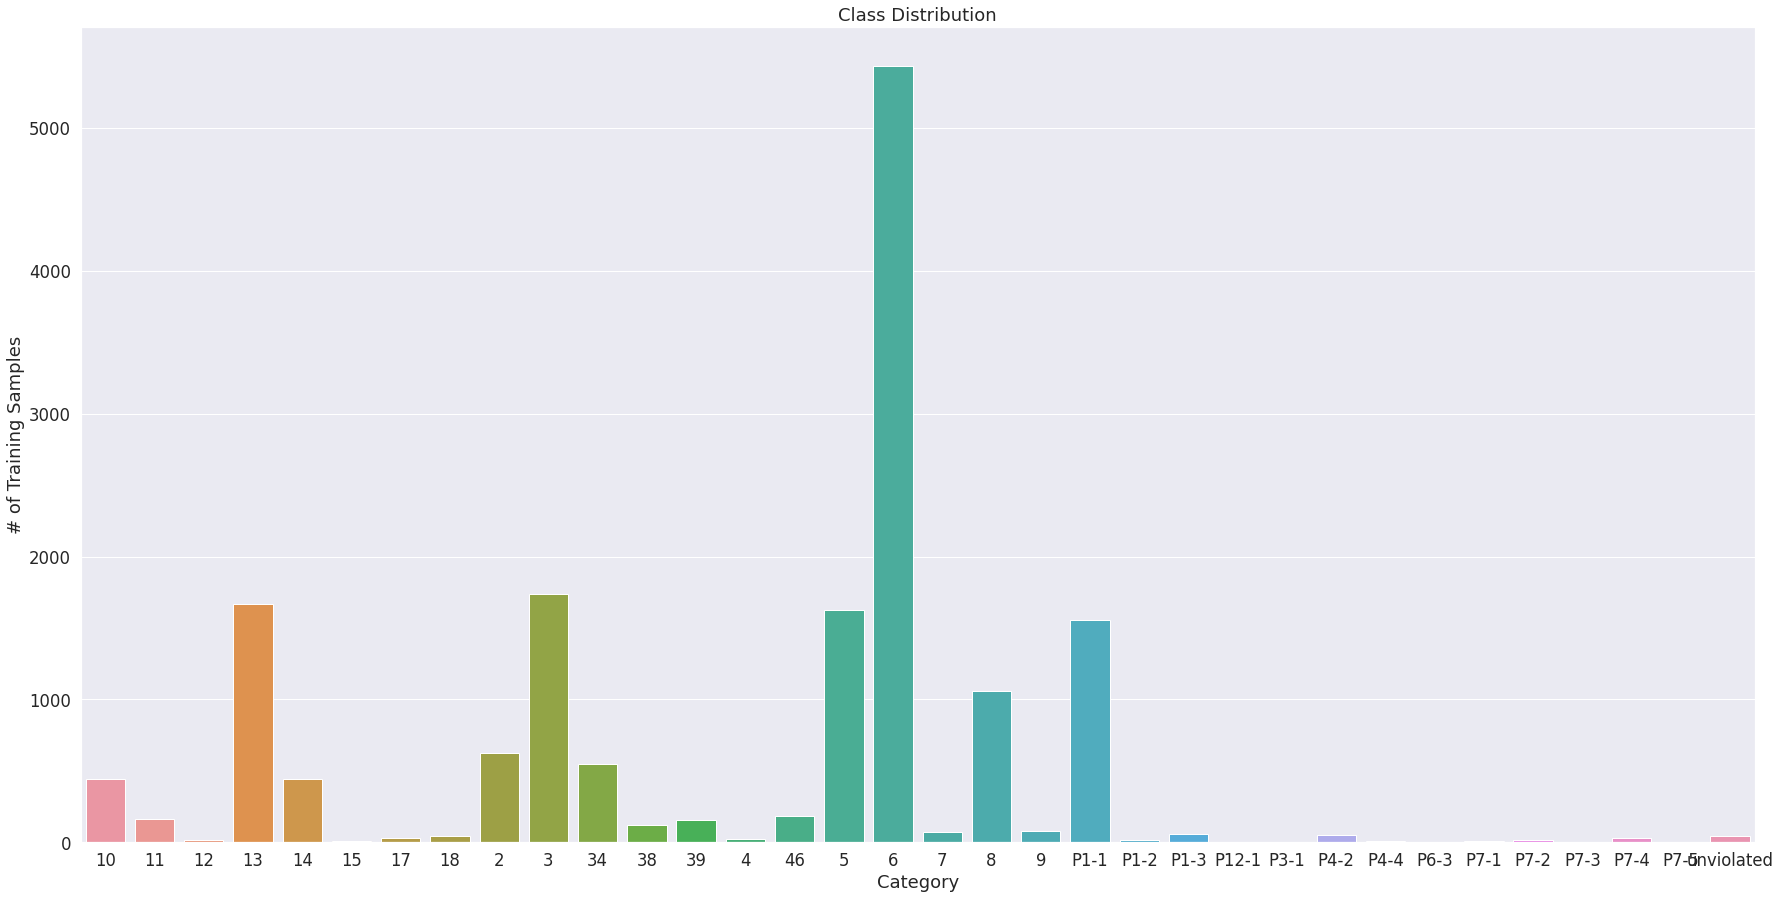

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (30,15)

# Plot the number of tokens of each length.
sns.barplot(x=train_label_cols, y=train_label_counts)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('# of Training Samples')

In [61]:
import numpy as np

train_lengths_en = []

train_labels_en = []

print('Tokenizing all examples to check sequence lengths...')

train_labels = train_df_join.Label.to_numpy()

# Iterate through the dataset...
for i, sen in enumerate(train_df_join.Fact):
    
    # Report progress.
    if ((len(train_lengths_en) % 3000) == 0):
        print('  Tokenized {:,} samples.'.format(len(train_lengths_en)))
    
    # `tokenizer.encode` will tokenize the sentence, map the tokens to ids, 
    # and add the required special tokens.:
    train_encoded = xlmr_tokenizer.encode(sen, add_special_tokens = True)

    # Record the length.
    train_lengths_en.append(len(train_encoded))
    train_labels_en.append(train_labels[i])

print('DONE.')
print('{:>10,} samples'.format(len(train_lengths_en)))

Token indices sequence length is longer than the specified maximum sequence length for this model (7517 > 512). Running this sequence through the model will result in indexing errors


Tokenizing all examples to check sequence lengths...
  Tokenized 0 samples.
  Tokenized 3,000 samples.
  Tokenized 6,000 samples.
DONE.
     9,000 samples


In [62]:
print('   Min length: {:,} tokens'.format(min(train_lengths_en)))
print('   Max length: {:,} tokens'.format(max(train_lengths_en)))
print('Median length: {:,} tokens'.format(int(np.median(train_lengths_en))))

   Min length: 64 tokens
   Max length: 46,300 tokens
Median length: 1,168 tokens


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


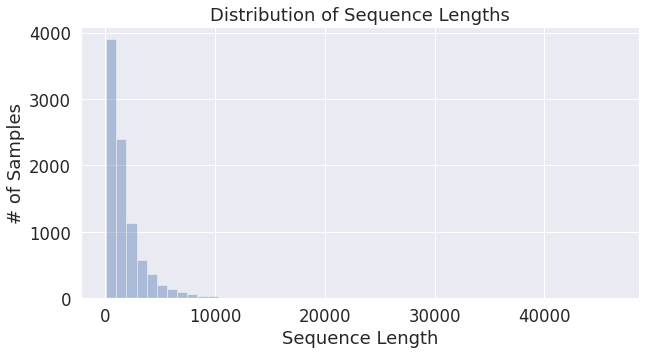

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Plot the distribution of comment lengths.
sns.distplot(train_lengths_en, kde=False, rug=False)

plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('# of Samples')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


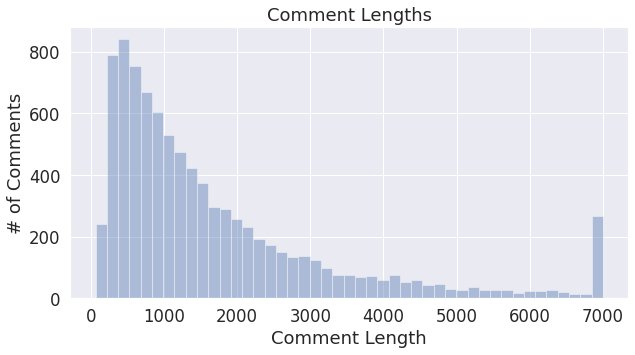

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Truncate any comment lengths greater than 512.
trunc_lengths = [min(l, 7000) for l in train_lengths_en]

# Plot the distribution of comment lengths.
sns.distplot(trunc_lengths, kde=False, rug=False)

# Alternatively, you might try using a log scale on the x-axis, but this is 
# tricky. See here for one approach:
# https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib?rq=1
#plt.xscale('log')

plt.title('Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('# of Comments')

plt.show()

In [65]:
import numpy as np

# Tokenize all of the sentences and map the tokens to their word IDs.
train_input_ids = []

# Record the length of each sequence (after truncating to 400).
train_lengths = []

# Get the labels from the DataFrame, and convert from booleans to ints.
train_labels = train_df_join.Label.to_numpy()

# Labels after some of the comments are divided into chunks.
train_chunk_labels = []

print('Tokenizing comments...')

# For every sentence...
for i, sen in enumerate(train_df_join.Fact):
    
    # Report progress.
    if ((len(train_input_ids) % 1000) == 0):
        print('  Read {:,} comments.'.format(len(train_input_ids)))
    
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    train_encoded_sent = xlmr_tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        #max_length = 400,          # Truncate all sentences.                        
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Get the label for this sentence.
    label = train_labels[i]

    # If the sentence is too long, chunk it.
    if len(train_encoded_sent) > 400:

        # Strip off special tokens.
        train_encoded_sent = train_encoded_sent[1:-1]
        #print('Sentence length:', len(encoded_sent))

        # Chunk the sentence, each sentence needs its own CLS and SEP tokens.
        chunk_len = 400 - 2

        # Make chunks...

        # For each starting index...
        for j in range(0, len(train_encoded_sent), chunk_len):
        
            # Make sure the end index doesn't go beyond the list.
            #end = min(j+chunk_len, len(encoded_sent) + 1)

            # What's the actual chunk length?
            #actual_len = end - j

            # Select the tokens. Note: Python slicing syntax makes this easier--
            # for the last chunk, even if the end index is past the end of the
            # list, the slice will just return what's there.
            tokens = train_encoded_sent[j:j+chunk_len]

            # Add the special tokens.
            chunk = [xlmr_tokenizer.cls_token_id] + tokens + [xlmr_tokenizer.sep_token_id]

            #print('  ', len(chunk))

            # Add the chunk to our encoded sentences.
            train_input_ids.append(chunk)

            # Give all the chunks the same label.
            train_chunk_labels.append(label) 
    
    # Otherwise, just add it to the list.
    else:
        train_input_ids.append(train_encoded_sent)
        train_chunk_labels.append(label)

print('DONE.')
print('{:>10,} comments before chunking'.format(len(train_df_join)))
print('{:>10,} comments after chunking'.format(len(train_input_ids)))

Tokenizing comments...
  Read 0 comments.
  Read 3,000 comments.
  Read 12,000 comments.
  Read 24,000 comments.
  Read 39,000 comments.
DONE.
     9,000 comments before chunking
    45,298 comments after chunking


In [66]:
validation_input_ids = []

validation_lengths = []

validation_labels = validation_df_join.Label.to_numpy()

validation_chunk_labels = []

print('Tokenizing comments...')

# For every sentence...
for i, sen in enumerate(validation_df_join.Fact):
    
    # Report progress.
    if ((len(validation_input_ids) % 1000) == 0):
        print('  Read {:,} comments.'.format(len(validation_input_ids)))
    
    validation_encoded_sent = xlmr_tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        #max_length = 400,          # Truncate all sentences.                        
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Get the label for this sentence.
    label = validation_labels[i]

    # If the sentence is too long, chunk it.
    if len(validation_encoded_sent) > 400:

        # Strip off special tokens.
        validation_encoded_sent = validation_encoded_sent[1:-1]

        chunk_len = 400 - 2

        # Make chunks...

        # For each starting index...
        for j in range(0, len(validation_encoded_sent), chunk_len):

            tokens = validation_encoded_sent[j:j+chunk_len]

            # Add the special tokens.
            chunk = [xlmr_tokenizer.cls_token_id] + tokens + [xlmr_tokenizer.sep_token_id]

            #print('  ', len(chunk))

            # Add the chunk to our encoded sentences.
            validation_input_ids.append(chunk)

            # Give all the chunks the same label.
            validation_chunk_labels.append(label) 
    
    # Otherwise, just add it to the list.
    else:
        validation_input_ids.append(validation_encoded_sent)
        validation_chunk_labels.append(label)

print('DONE.')
print('{:>10,} comments before chunking'.format(len(validation_df_join)))
print('{:>10,} comments after chunking'.format(len(validation_input_ids)))

Tokenizing comments...
  Read 0 comments.
DONE.
     1,000 comments before chunking
     5,623 comments after chunking


In [67]:
# The number of samples and number of labels should match.
assert(len(train_input_ids) == len(train_chunk_labels))

In [189]:
len(train_chunk_labels)

45298

In [68]:
assert(len(validation_input_ids) == len(validation_chunk_labels))

In [69]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the required sequence length.
MAX_LEN = 400

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(xlmr_tokenizer.pad_token, xlmr_tokenizer.pad_token_id))

# Pad our input tokens with value 0.
train_input_ids = pad_sequences(train_input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 400 values...

Padding token: "<pad>", ID: 1

Done.


In [70]:
# Set the required sequence length.
MAX_LEN = 400

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(xlmr_tokenizer.pad_token, xlmr_tokenizer.pad_token_id))

# Pad our input tokens with value 0.
validation_input_ids = pad_sequences(validation_input_ids, maxlen=MAX_LEN, dtype="long", 
                value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 400 values...

Padding token: "<pad>", ID: 1

Done.


In [71]:
# Create attention masks
train_attention_masks = []

# For each sentence...
for sent in train_input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    train_att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    train_attention_masks.append(train_att_mask)

In [72]:
# Create attention masks
validation_attention_masks = []
# For each sentence...
for sent in validation_input_ids:    
    # Create the attention mask.
    validation_att_mask = [int(token_id > 0) for token_id in sent]
    # Store the attention mask for this sentence.
    validation_attention_masks.append(validation_att_mask)

In [73]:
len(train_chunk_labels)

45298

In [74]:
train_mlb.classes_.tolist()

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '17',
 '18',
 '2',
 '3',
 '34',
 '38',
 '39',
 '4',
 '46',
 '5',
 '6',
 '7',
 '8',
 '9',
 'P1-1',
 'P1-2',
 'P1-3',
 'P12-1',
 'P3-1',
 'P4-2',
 'P4-4',
 'P6-3',
 'P7-1',
 'P7-2',
 'P7-3',
 'P7-4',
 'P7-5']

In [204]:
train_chunk_mlb = MultiLabelBinarizer()

train_chunk_yt = train_chunk_mlb.fit_transform(train_chunk_labels)
print(train_chunk_yt.shape)
train_df_chunk_labels_onehot = pd.DataFrame(train_chunk_yt, columns = train_chunk_mlb.classes_.tolist())
train_df_chunk_labels_onehot

(45298, 33)


,10,11,12,13,14,15,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P3-1,P4-2,P4-4,P6-3,P7-1,P7-2,P7-3,P7-4,P7-5
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45293,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45294,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
45296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
validation_chunk_mlb = MultiLabelBinarizer()

validation_chunk_yt = validation_chunk_mlb.fit_transform(validation_chunk_labels)
print(validation_chunk_yt.shape)
validation_df_chunk_labels_onehot = pd.DataFrame(validation_chunk_yt, columns = validation_chunk_mlb.classes_.tolist())
validation_df_chunk_labels_onehot

(5623, 29)


,10,11,12,13,14,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P4-2,P4-4,P7-1,P7-2,P7-4,P7-5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5619,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5620,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5621,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
num_chunks_val = validation_df_chunk_labels_onehot.shape[0]

In [78]:
validation_df_chunk_labels_onehot.insert(idx[0], diff[0], np.zeros(num_chunks_val, dtype = "int"))
validation_df_chunk_labels_onehot.insert(idx[1], diff[1], np.zeros(num_chunks_val, dtype = "int"))
validation_df_chunk_labels_onehot.insert(idx[2], diff[2], np.zeros(num_chunks_val, dtype = "int"))
validation_df_chunk_labels_onehot.insert(idx[3], diff[3], np.zeros(num_chunks_val, dtype = "int"))

In [79]:
validation_df_chunk_labels_onehot

,10,11,12,13,14,15,17,18,2,3,34,38,39,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P12-1,P3-1,P4-2,P4-4,P6-3,P7-1,P7-2,P7-3,P7-4,P7-5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5619,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5620,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5621,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
train_df_chunk_labels_onehot.to_csv("/content/drive/MyDrive/Data/AIjudge/train_chunk_labels400.csv")
validation_df_chunk_labels_onehot.to_csv("/content/drive/MyDrive/Data/AIjudge/validation_chunk_labels400.csv")
#test_df.to_csv("/content/drive/MyDrive/Data/AIjudge/test_df_pandas.csv")

In [81]:
# Convert each Python list of Tensors into a 2D Tensor matrix.
train_input_ids = torch.tensor(train_input_ids)
train_attn_masks = torch.tensor(train_attention_masks)

In [82]:
validation_input_ids = torch.tensor(validation_input_ids)
validation_attn_masks = torch.tensor(validation_attention_masks)

In [83]:
train_chunk_labels_tensor = train_df_chunk_labels_onehot[train_mlb.classes_.tolist()]

# The labels are either 0 or 1. Despite this, we need to cast the values to
# floats--otherwise our loss function will throw an error.
# https://discuss.pytorch.org/t/nn-bcewithlogitsloss-cant-accept-one-hot-target/59980
train_chunk_labels_tensor = train_chunk_labels_tensor.to_numpy().astype(float)

# Cast the labels list to a 2D Tensor.
train_chunk_labels_tensor = torch.tensor(train_chunk_labels_tensor)

In [84]:
validation_chunk_labels_tensor = validation_df_chunk_labels_onehot[train_mlb.classes_.tolist()]

# The labels are either 0 or 1. Despite this, we need to cast the values to
# floats--otherwise our loss function will throw an error.
# https://discuss.pytorch.org/t/nn-bcewithlogitsloss-cant-accept-one-hot-target/59980
validation_chunk_labels_tensor = validation_chunk_labels_tensor.to_numpy().astype(float)

# Cast the labels list to a 2D Tensor.
validation_chunk_labels_tensor = torch.tensor(validation_chunk_labels_tensor)

In [85]:
print('\nData structure shapes:')
print('   input_ids:  {:}'.format(str(train_input_ids.shape)))
print('  attn_masks:  {:}'.format(str(train_attn_masks.shape)))
print('      labels:  {:}'.format(str(train_chunk_labels_tensor.shape)))


Data structure shapes:
   input_ids:  torch.Size([45298, 400])
  attn_masks:  torch.Size([45298, 400])
      labels:  torch.Size([45298, 33])


In [86]:
print('\nData structure shapes:')
print('   input_ids:  {:}'.format(str(validation_input_ids.shape)))
print('  attn_masks:  {:}'.format(str(validation_attn_masks.shape)))
print('      labels:  {:}'.format(str(validation_chunk_labels_tensor.shape)))


Data structure shapes:
   input_ids:  torch.Size([5623, 400])
  attn_masks:  torch.Size([5623, 400])
      labels:  torch.Size([5623, 33])


In [87]:
from torch.utils.data import TensorDataset

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(train_input_ids, train_attn_masks, train_chunk_labels_tensor)

In [88]:
train_dataset

In [89]:
val_dataset = TensorDataset(validation_input_ids, validation_attn_masks, validation_chunk_labels_tensor)

In [90]:
from torch import nn
from torch.nn import BCEWithLogitsLoss
from transformers import RobertaPreTrainedModel, XLMRobertaModel

class XLMRobertaForMultiLabelSequenceClassification(RobertaPreTrainedModel):
    '''
    This custom class closely resembles BertForSequenceClassification, which
    supports multiclass classification, but not multi-label.
    This modified version supports data points with multiple labels.
    '''

    def __init__(self, config):
        '''
        Class initializer, called when we create a new instance of this class.
        '''

        # Call the init function of the parent class (BertPreTrainedModel)        
        super().__init__(config)
       
        # Store the number of labels.
        self.num_labels = config.num_labels
        
        # Create a `BertModel`--this implements all of BERT except for the final
        # task-specific output layer (which is what we'll do here in `forward`). 
        self.bert = XLMRobertaModel(config)

        # Setup dropout object (note: I'm not familiar enough to speak to this).
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

        # Create a [768 x 6] weight matrix to use as our classifier.
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        # Initialize model weights (inherited function).
        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
    ):
        '''
        This function defines what happens on a forward pass of our model, both
        for training and evaluation. For example, when we call 
            `model(b_input_ids, ...)`
        during our training loop, it results in a call to this `forward`
        function.
        '''

        # ====================
        #   Run Through BERT
        # ====================

        # All of BERT's (non-task-specific) architecture is implemented by the
        # BertModel class. Here we pass all of the inputs through our BertModel
        # instance. 
        outputs = self.bert(
            input_ids,                      # The input sequence
            attention_mask=attention_mask,  # Mask out any [PAD] tokens.
            token_type_ids=token_type_ids,  # Identify segment A vs. B
            position_ids=position_ids,      # TODO...
            head_mask=head_mask,            # TODO...
            inputs_embeds=inputs_embeds,    # Presumably the initial embeddings
                                            # for the tokens in our sequence.
            output_attentions=output_attentions, # Boolean, whether to return
                                                 # all of the attention scores.
            output_hidden_states=output_hidden_states, # Whether to return
                                                       # embeddings from all 12
                                                       # layers.
        )

        # Side note: It confused me to see us *invoking* an instance of a class
        # (calling self.bert(...)) as if it were a function! I learned that in 
        # Python, an instance of a class can be callable if the class defines a 
        # `__call__` method! 
        # BertModel ultimately inherits from torch.nn.Module, which I imagine 
        # implements a `__call__` method that allows PyTorch to work its magic.

        # The forward pass of 'BertModel' (the call to `self.bert`) returns two
        # items.

        # The first output is the final embeddings taken from the output of 
        # the final BERT encoder layer.
        #
        # `final_embeddings` has dimensions:
        #    [ batch size  x  sequence length  x  768]
        #      (768 is the length of the embeddings in BERT-base)
        #
        # I've included this here for informational purposes, but we won't 
        # actually use the `final_embeddings` anywhere here!
        final_embeddings = outputs[0]

        # ===========================
        #   Apply Output Classifier
        # ===========================

        # The second output is the activated form of the final [CLS] embedding. 
        # This comes from the so-called "pooling layer" that BERT has on its 
        # output which is only applied to the [CLS] token and none of the
        # others.
        #
        # You can see the definition of BertPooler.forward here:
        # https://github.com/huggingface/transformers/blob/0735def8e1200ed45a2c33a075bc1595b12ef56a/src/transformers/modeling_bert.py#L506
        #
        # It takes the final embedding for the [CLS] token (and *only* that
        # token), multiplies it with a [768 x 768] weight matrix, and then
        # applies tanh activation to each of the 768 features in the embedding.
        activated_cls = outputs[1]

        # Apply dropout (note: I'm not familiar enough with dropout to speak to
        # it, but I believe it is applied during training only, and is turned 
        # off during evaluation mode when we call `model.eval()`).
        activated_cls = self.dropout(activated_cls)
        
        # Send it through our linear "classifier". The "classifier" is actually
        # just a [768 x 6] weight matrix, with *no activation function*. 
        # Multiplying the activated CLS embedding with this matrix results in
        # a vector with 6 values, which are the scores for each of our classes.
        # Because we have not applied the activation function, these output 
        # values are referred to as "logits". 
        # When performing evaluation (not training), the logits are adequate for
        # making a classification, since the activation function does not change
        # the ranking of the results.
        # So, in evaluation mode, we are done here!
        logits = self.classifier(activated_cls)
        
        # ===================
        #   Training Mode
        # ===================

        # If labels for the inputs have been provided, we take that to mean that
        # we are in training mode, and we need to calculate the loss function.
        if labels is not None:
            
            # The Binary Cross-Entropy Loss function is defined for us in 
            # PyTorch by the `BCEWithLogitsLoss` class.
            #
            # This loss function will:
            #   1. Apply the sigmoid activation to each of our 6 logit values.
            #   2. Feed those outputs, along with the correct labels, through 
            #      the binary cross entropy loss function to calculate a 
            #      (single?) loss value for the sample.
            loss_fct = BCEWithLogitsLoss()

            # Call the loss function, giving it the `logits` and the correct
            # `labels`.
            loss = loss_fct(logits.view(-1, self.num_labels), # The logits
                            labels.view(-1, self.num_labels)) # The labels

            # What's view(-1, ...)?
            # The `view` function is used to reshape tensors. `-1` tells PyTorch
            # to infer that dimension by dividing the total number of elements
            # by the other dimensions.
            # For batched input, this call to view is not necessary. Both
            # `logits` and `labels` are already [16 x 6] here.
            # Perhaps it's there to re-shape the tensors if you're only
            # evaluating on a single input instead of a batch?

            # Output is (loss, logits, <bonus returns>)
            # The 'bonus return' values are the attentions and the hidden states
            # from all 12 layers, but these are only returned by `BertModel` if
            # the appropriate flags are set. 
            return ((loss, logits) + outputs[2:])

        # ===================
        #   Evaluation Mode
        # ===================

        # Otherwise, in evaluation mode...
        else:
        
            # Output is (logits, <bonus returns>)
            # Again, the logits are adequate for classification, so we don't
            # bother applying the (sigmoid) activation function here.
            return ((logits,) + outputs[2:])

## S4. Train Our Classification Model

In [91]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [92]:
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
from transformers import XLMRobertaForMaskedLM
continue_trained_model = XLMRobertaForMaskedLM.from_pretrained("./facts_en_ch_trained")

### 4.1. Initialize Model with Pre-Trained Weights

In [132]:
from transformers import AdamW, BertConfig, XLMRobertaConfig, RobertaConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = XLMRobertaForMultiLabelSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/Data/AIjudge/facts_en_ch_trained",
    #"xlm-roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 33,    
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
desc = model.cuda()

print ("Model loaded.")

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/drive/MyDrive/Data/AIjudge/facts_en_ch_trained were not used when initializing XLMRobertaForMultiLabelSequenceClassification: ['roberta.encoder.layer.0.attention.output.dense.bias', 'roberta.encoder.layer.6.attention.self.value.bias', 'roberta.encoder.layer.8.attention.output.LayerNorm.bias', 'roberta.encoder.layer.6.attention.self.query.weight', 'roberta.encoder.layer.10.intermediate.dense.bias', 'roberta.encoder.layer.2.attention.self.query.bias', 'roberta.encoder.layer.2.output.dense.weight', 'roberta.encoder.layer.3.attention.self.query.weight', 'roberta.encoder.layer.1.intermediate.dense.weight', 'roberta.encoder.layer.11.attention.self.key.bias', 'roberta.encoder.layer.7.attention.output.LayerNorm.weight', 'roberta.encoder.layer.0.intermediate.dense.bias', 'roberta.encoder.la

Model loaded.


### 4.4. Batch Size & DataLoaders

We'll also create a PyTorch DataLoader for our dataset. 

The DataLoader simply handles the creation of training batches for us. 

**Choice of Batch Size**

Training on a small batch of training samples at once (rather than one sample at a time) makes more efficient use of our GPU's parallel processing capabilities, and seems to even improve the model's accuracy.

The BERT authors recommend trying a batch size of either 16 or 32. For this Notebook, we'll be using a **batch size of 16**.

**Randomization**

The DataLoader for our training set will construct batches for us by randomly selecting different samples to put in each batch (each training sample will only appear in one batch, though!). 

Randomizing the training samples is considered good practice. Moreover, I believe the randomization is re-done for each training epoch (each pass through our training set), and that this can improve model accuracy.

For validation, it doesn't matter what order we execute in.

In [133]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Specify our batch size.
batch_size = 16

# Create the DataLoaders for our training sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

### 4.5. Optimizer

Our `model` object handles the execution of a forward pass, and the calculation of gradients during training. 

The actual updates to the model's weights, however, are performed by an Optimizer object. Here, we create that object and give it a reference to our model's parameters, as well as set some of our training hyperparameters.

For the purposes of fine-tuning, the authors recommend the following choices of learning rates: 5e-5, 3e-5, 2e-5  (We'll use 2e-5).

The epsilon parameter `eps = 1e-8` is "a very small number to prevent any division by zero in the implementation" (from [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)).

You can find the creation of the AdamW optimizer in `run_glue.py` [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L109).

With the original BERT model, the authors recommended trying one of the first three of the following learning rates when fine-tuning. We found that a smaller learning rate (5e-6) helped with XLM-R, though.

```
0.00005  # 5e-5
0.00003  # 3e-5
0.00002  # 2e-5
0.000005 # 5e-6
```

It'd be worth experimenting more with this value.

In [134]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, XLM-R lr = 5e-6,
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

### 4.6. Epochs & Learning Rate Scheduler

The learning rate scheduler is responsible for updating the learning rate over the course of the training. Generally speaking, you want the learning rate to gradually get smaller and smaller so that training makes gradually finer adjustments to the weights. 

This decay needs to happen *across all of the training epochs*, so this is where we need to specify the number of epochs we want to train for. 

In [135]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (BERT authors recommend between 2 and 4)
epochs = 3

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                      num_warmup_steps = 0, # Default value in run_glue.py
                      num_training_steps = total_steps)

**Helper Functions**


In [136]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))  

In [137]:
def good_update_interval(total_iters, num_desired_updates):
    '''
    This function will try to pick an intelligent progress update interval 
    based on the magnitude of the total iterations.

    Parameters:
      `total_iters` - The number of iterations in the for-loop.
      `num_desired_updates` - How many times we want to see an update over the 
                              course of the for-loop.
    '''
    # Divide the total iterations by the desired number of updates. Most likely
    # this will be some ugly number.
    exact_interval = total_iters / num_desired_updates

    # The `round` function has the ability to round down a number to, e.g., the
    # nearest thousandth: round(exact_interval, -3)
    #
    # To determine the magnitude to round to, find the magnitude of the total,
    # and then go one magnitude below that.

    # Get the order of magnitude of the total.
    order_of_mag = len(str(total_iters)) - 1

    # Our update interval should be rounded to an order of magnitude smaller. 
    round_mag = order_of_mag - 1

    # Round down and cast to an int.
    update_interval = int(round(exact_interval, -round_mag))

    # Don't allow the interval to be zero!
    if update_interval == 0:
        update_interval = 1

    return update_interval

In [138]:
from sklearn.metrics import roc_auc_score

# A quick example...
true_labels = [0,1,0,0,1]
pred_labels = [0,1,0,0,0]

score = roc_auc_score(true_labels, pred_labels, average='macro')

print('Example ROC AUC score:', score)

Example ROC AUC score: 0.75


In [112]:
idx

[5, 24, 27, 30]

In [121]:
nnn = 0
true_labels = []
for batch in validation_dataloader:
  nnn+=1
  if nnn > 1:
    break
  else:
    #print(batch[2])
    label_ids = batch[2].numpy()
    # Store predictions and true labels
    true_labels.append(label_ids)
# Measure validation accuracy...
# Combine the results across all batches. 
flat_true_labels = np.concatenate(true_labels, axis=0)
print(flat_true_labels[0])
flat_true_labels
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 

        

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
flat_true_labels_pandas = pd.DataFrame(flat_true_labels, columns = train_chunk_mlb.classes_.tolist())
flat_true_labels_modified = flat_true_labels_pandas.drop([diff[0]],axis=1)
flat_true_labels_modified = flat_true_labels_modified.drop([diff[1]],axis=1)
flat_true_labels_modified = flat_true_labels_modified.drop([diff[2]],axis=1)
flat_true_labels_modified = flat_true_labels_modified.drop([diff[3]],axis=1)
flat_true_labels_np = np.array(flat_true_labels_modified)

In [131]:
#flat_true_labels_modified

In [130]:
flat_true_labels_np = np.array(flat_true_labels_modified)
flat_true_labels_np

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1

### 4.7. Training loop

In [139]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # Pick an interval on which to print progress updates.
    update_interval = good_update_interval(
                total_iters = len(train_dataloader), 
                num_desired_updates = 10
            )

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update.
        if (step % update_interval) == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This call returns the loss (because we provided labels) and the 
        # "logits"--the model outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
 
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_loss = 0

    predictions, true_labels = [], []

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():   
   

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Calculate the accuracy for this batch of test sentences.

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        predictions.append(logits)
        true_labels.append(label_ids)

    # Measure validation accuracy...

    # Combine the results across all batches. 
    flat_predictions = np.concatenate(predictions, axis=0)
    flat_true_labels = np.concatenate(true_labels, axis=0)


    flat_true_labels_pandas = pd.DataFrame(flat_true_labels, columns = train_chunk_mlb.classes_.tolist())
    flat_true_labels_modified = flat_true_labels_pandas.drop([diff[0]],axis=1)
    flat_true_labels_modified = flat_true_labels_modified.drop([diff[1]],axis=1)
    flat_true_labels_modified = flat_true_labels_modified.drop([diff[2]],axis=1)
    flat_true_labels_modified = flat_true_labels_modified.drop([diff[3]],axis=1)
    flat_true_labels_np = np.array(flat_true_labels_modified)

    flat_predictions_pandas = pd.DataFrame(flat_predictions, columns = train_chunk_mlb.classes_.tolist())
    flat_predictions_modified = flat_predictions_pandas.drop([diff[0]],axis=1)
    flat_predictions_modified = flat_predictions_modified.drop([diff[1]],axis=1)
    flat_predictions_modified = flat_predictions_modified.drop([diff[2]],axis=1)
    flat_predictions_modified = flat_predictions_modified.drop([diff[3]],axis=1)
    flat_predictions_np = np.array(flat_predictions_modified)

    # Calculate the validation accuracy.
    #val_accuracy = roc_auc_score(flat_true_labels, flat_predictions, average='macro')
    val_accuracy = roc_auc_score(flat_true_labels_np, flat_predictions_np, average='macro')

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch   300  of  2,832.    Elapsed: 0:03:24.
  Batch   600  of  2,832.    Elapsed: 0:06:47.
  Batch   900  of  2,832.    Elapsed: 0:10:11.
  Batch 1,200  of  2,832.    Elapsed: 0:13:35.
  Batch 1,500  of  2,832.    Elapsed: 0:16:58.
  Batch 1,800  of  2,832.    Elapsed: 0:20:22.
  Batch 2,100  of  2,832.    Elapsed: 0:23:46.
  Batch 2,400  of  2,832.    Elapsed: 0:27:09.
  Batch 2,700  of  2,832.    Elapsed: 0:30:33.

  Average training loss: 0.14
  Training epcoh took: 0:32:02

Running Validation...
  Accuracy: 0.65
  Validation Loss: 0.13
  Validation took: 0:01:16

======== Epoch 2 / 3 ========
Training...
  Batch   300  of  2,832.    Elapsed: 0:03:24.
  Batch   600  of  2,832.    Elapsed: 0:06:48.
  Batch   900  of  2,832.    Elapsed: 0:10:12.
  Batch 1,200  of  2,832.    Elapsed: 0:13:36.
  Batch 1,500  of  2,832.    Elapsed: 0:17:00.
  Batch 1,800  of  2,832.    Elapsed: 0:20:25.
  Batch 2,100  of  2,832.    Elapsed: 0:23:49.
  Batch 2

In [140]:
12

12

In [145]:
loss_values = []
for epoch in training_stats:
  loss_values.append(epoch['Training Loss'])

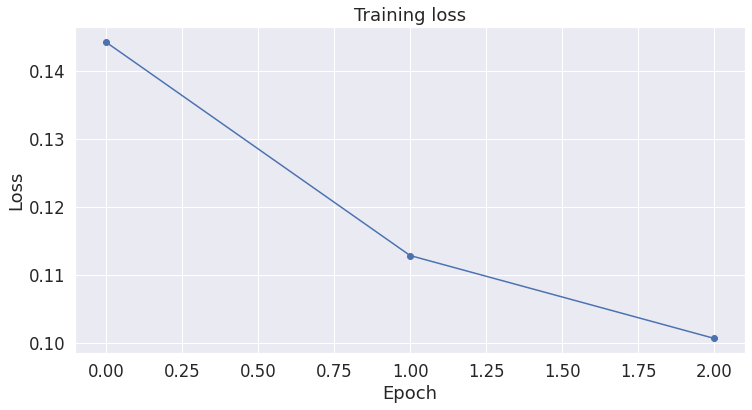

In [146]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## S5. Performance On Test Set

Now we'll load the holdout dataset and prepare inputs just as we did with the training set.

### 5.1. Tokenize Test Set with Chunking

We'll need to apply all of the same steps that we did for the training data to prepare our test data set.

**Chunk the Test Samples**

In [172]:
import numpy as np

# Tokenize all of the sentences and map the tokens to thier word IDs.
test_input_ids = []

# Record the length of each sequence (after truncating to 512).
test_lengths = []

# Get the labels from the DataFrame, and convert from booleans to ints.
test_labels = test_df_join.Label.to_numpy()

# Labels after some of the comments are divided into chunks.
test_chunk_labels = []

print('Tokenizing comments...')

# Build a Python Dictionary which maps each original test sample to its list of
# chunks.
orig_to_chunk = {}

# For every sentence...
for i, sen in enumerate(test_df_join.Fact):
    
    # Report progress.
    if ((len(test_input_ids) % 200) == 0):
        print('  Read {:,} facts.'.format(len(test_input_ids)))
    
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    test_encoded_sent = xlmr_tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        #max_length = 512,          # Truncate all sentences.                        
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    label = test_labels[i]
    # Create the list of chunk indeces for this test sample.
    orig_to_chunk[i] = []

    # If the sentence is too long, chunk it.
    if len(test_encoded_sent) > 400:

        # Strip off special tokens.
        test_encoded_sent = test_encoded_sent[1:-1]
        #print('Sentence length:', len(encoded_sent))

        # Specify the length of our chunks. Each sentence needs its own CLS and 
        # SEP tokens, so to get sequences of 128 tokens, we need to
        # create chunks of at most 126 tokens.
        chunk_len = 400 - 2

        # Make chunks...

        # For each starting index...
        for j in range(0, len(test_encoded_sent), chunk_len):
        
            # Make sure the end index doesn't go beyond the list.
            #end = min(j+chunk_len, len(encoded_sent) + 1)

            # What's the actual chunk length?
            #actual_len = end - j

            # Select the tokens. Note: Python slicing syntax makes this easier--
            # for the last chunk, even if the end index is past the end of the
            # list, the slice will just return what's there.
            tokens = test_encoded_sent[j:j+chunk_len]

            # Add the special tokens.
            chunk = [xlmr_tokenizer.cls_token_id] + tokens + [xlmr_tokenizer.sep_token_id]

            #print('  ', len(chunk))

            # Add the chunk to our encoded sentences.
            test_input_ids.append(chunk)

            test_chunk_labels.append(label) 

            # Map from the original test sample index to the index of this 
            # chunk.
            orig_to_chunk[i].append(len(test_input_ids) - 1)
    
    # Otherwise, just add it to the list.
    else:
        test_input_ids.append(test_encoded_sent)
        test_chunk_labels.append(label)

        # Map from the original test sample index to the index of its only
        # chunk.        
        orig_to_chunk[i].append(len(test_input_ids) - 1)

print('DONE.')
print('{:>10,} comments before chunking'.format(len(test_df_join)))
print('{:>10,} comments after chunking'.format(len(test_input_ids)))

Tokenizing comments...
  Read 0 facts.
  Read 800 facts.
  Read 1,000 facts.
  Read 4,800 facts.
  Read 5,200 facts.
  Read 5,800 facts.
DONE.
     1,000 comments before chunking
     6,081 comments after chunking


In [181]:
test_chunk_yt

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [182]:
test_chunk_mlb = MultiLabelBinarizer()
test_chunk_yt = test_chunk_mlb.fit_transform(test_chunk_labels)
print(test_chunk_yt.shape)
print(test_chunk_yt[0])
print(test_chunk_mlb.inverse_transform(test_chunk_yt[0].reshape(1,-1)))
print(test_chunk_mlb.classes_)

(6081, 28)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[('10',)]
['10' '11' '12' '13' '14' '15' '17' '18' '2' '3' '34' '38' '4' '46' '5'
 '6' '7' '8' '9' 'P1-1' 'P1-2' 'P1-3' 'P4-2' 'P7-1' 'P7-2' 'P7-3' 'P7-4'
 'P7-5']


In [183]:
test_df_chunk_labels_onehot = pd.DataFrame(test_chunk_yt, columns = test_chunk_mlb.classes_.tolist())
test_df_chunk_labels_onehot

,10,11,12,13,14,15,17,18,2,3,34,38,4,46,5,6,7,8,9,P1-1,P1-2,P1-3,P4-2,P7-1,P7-2,P7-3,P7-4,P7-5
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6077,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6078,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6079,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [184]:
test_chunk_labels_tensor = test_df_chunk_labels_onehot[test_mlb.classes_.tolist()]

# The labels are either 0 or 1. Despite this, we need to cast the values to
# floats--otherwise our loss function will throw an error.
# https://discuss.pytorch.org/t/nn-bcewithlogitsloss-cant-accept-one-hot-target/59980
test_chunk_labels_tensor = test_chunk_labels_tensor.to_numpy().astype(float)

# Cast the labels list to a 2D Tensor.
test_chunk_labels_tensor = torch.tensor(test_chunk_labels_tensor)

In [193]:
# Also retrieve the labels as a list.

# Get the labels from the DataFrame, and convert from booleans to ints.
test_labels = test_df_chunk_labels_onehot[test_mlb.classes_.tolist()].to_numpy().astype(float)

#print('{:>10,} positive (contains attack)'.format(np.sum(test_labels)))
#print('{:>10,} negative (not an attack)'.format(len(test_labels) - np.sum(test_labels)))

# For evaluating the test set, the individual chunk labels don't matter, so
# we'll just make the list all zeros.
chunk_labels = [0]*len(test_input_ids)

# Pad our input tokens
test_input_ids = pad_sequences(test_input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
test_attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in test_input_ids:
  seq_mask = [float(i>0) for i in seq]
  test_attention_masks.append(seq_mask) 

# Convert to tensors.
test_inputs = torch.tensor(test_input_ids)
test_masks = torch.tensor(test_attention_masks)
chunk_labels = torch.tensor(chunk_labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
test_data = TensorDataset(test_inputs, test_masks, chunk_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

### 5.2. Evaluate on Test Set

With the test set prepared, we can apply our fine-tuned model to generate predictions on the test set.

There are no changes required in this cell for chunking--we'll just run all of the chunks through the model and retrieve the logits. Then, in the next section, we'll average together the appropriate outputs.

In [190]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Measure elapsed time.
t0 = time.time()

# Predict 
for (step, batch) in enumerate(test_dataloader):
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Progress update every 100 batches.
    if step % 100 == 0 and not step == 0:
        # Calculate elapsed time in minutes.
        elapsed = format_time(time.time() - t0)
        
        # Report progress.
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))


    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits to CPU
    logits = logits.detach().cpu().numpy()
  
    # Store predictions and true labels
    predictions.append(logits)

print('    DONE.')

Predicting labels for 6,081 test sentences...
  Batch   100  of    191.    Elapsed: 0:00:42.
    DONE.


In [161]:
len(predictions)

191

`predictions` has one element per batch. Collapse the batches so we have one continuous list of predictions.

In [162]:
# Combine the results across the batches.
predictions_combined = np.concatenate(predictions, axis=0)

Here are the outputs for the first 5 samples / chunks. There are two columns--the first column is the output of the "label 0" (not an attack) classifier head, and the other is the output of the "label 1" (contains an attack) classifier.

In [191]:
predictions_combined.shape

(6081, 33)

In [195]:
test_labels.shape

(6081, 28)

In [219]:
test_df_labels_onehot.shape

(1000, 28)

In [ ]:
diff_tr_te = 

In [205]:
len(train_chunk_mlb.classes_.tolist())

33

In [206]:
predictions_combined_pandas = pd.DataFrame(predictions_combined, columns = train_chunk_mlb.classes_.tolist())
predictions_combined_modified = predictions_combined_pandas.drop([diff_tr_te[0]],axis=1)
predictions_combined_modified = predictions_combined_modified.drop([diff_tr_te[1]],axis=1)
predictions_combined_modified = predictions_combined_modified.drop([diff_tr_te[2]],axis=1)
predictions_combined_modified = predictions_combined_modified.drop([diff_tr_te[3]],axis=1)
predictions_combined_modified = predictions_combined_modified.drop([diff_tr_te[4]],axis=1)
predictions_combined_np = np.array(predictions_combined_modified)
predictions_combined_np.shape

(6081, 28)

In [233]:
predictions_combined_np[6000]

array([-4.542532  , -4.1707144 , -6.3978114 , -1.9194516 , -1.610069  ,
       -7.2021317 , -5.55716   , -4.5741444 , -4.6539636 , -3.9354482 ,
       -2.1421866 , -5.5339684 , -5.9820805 , -3.0321631 , -3.7455792 ,
        0.02622586, -4.8342676 , -1.8875601 , -4.601761  ,  0.9760537 ,
       -6.173631  , -4.7514844 , -5.1179953 , -7.062251  , -6.2492537 ,
       -7.9330463 , -5.9671564 , -7.7100773 ], dtype=float32)

In [ ]:

    # Calculate the validation accuracy.
    #val_accuracy = roc_auc_score(flat_true_labels, flat_predictions, average='macro')
test_accuracy = roc_auc_score(flat_true_labels_np, predictions_combined_np, average='macro')

#### Using Only the First Chunk (Sanity Check)

As a kind of sanity test, we can use just the predictions on the first chunk of every sample. We'd expect this to achieve close to the same accuracy that we got in the original Notebook, since this is equivalent to just truncating the test samples.

The only difference is that in this notebook we had more training samples, because we trained on all of the chunks. 

In [218]:
len(orig_to_chunk)

1000

In [214]:
len(true_labels)

6081

In [227]:
len(p1)

1000

In [229]:
test_df_labels_onehot_np = np.array(test_df_labels_onehot)
test_df_labels_onehot_np.shape

(1000, 28)

In [241]:
# Get the labels for the original (unchunked) comments.
true_labels = test_df_labels_onehot_np

p1 = []

# For each of the original test samples...
for test_i in range(0, len(true_labels)):

    # `chunk_i` is the index into `predictions` for the first chunk of test 
    # sample `test_i`.
    chunk_i = orig_to_chunk[test_i][0]

    # `predictions` has two columns--take the output from the "label 1" 
    # classifier to use for our prediction.
    p1.append(list(predictions_combined_np[chunk_i]))

p1_np = np.array(p1)
# Calculate the ROC AUC.
auc = roc_auc_score(true_labels, p1_np)

print('Test ROC AUC: %.3f' %auc)

Test ROC AUC: 0.780


In [242]:
p1_np.shape

(1000, 28)

This is lower than the score we got in the original notebook! There we got 0.969.

The only difference (besides the possibility of some randomness...) is that this model was trained on additional samples--the remaining chunks. This suggests to me that these additional chunks may have actually confused the model more than helped it.

Let's see how our performance on the test set goes when we average together the scores for the chunks.

#### Averaging Together Chunk Scores

Here, for a given *original* (full-text) test sample, we'll select the outputs for all of its chunks, and average them together for our prediction.

In [248]:
# Get the labels for the original (unchunked) comments.
true_labels = test_df_labels_onehot_np

p2 = []

# For each of the original test samples...
for test_i in range(0, len(true_labels)):

    # `chunk_indeces` is the list of indeces in `predictions` of the chunks for
    # sample `test_i`.
    chunk_indeces = orig_to_chunk[test_i]

    # Select the outputs of the "label 1" classifier for all chunks
    chunks_outputs = predictions_combined_np[chunk_indeces]

    # Average them and use this as the prediction.
    p2.append(np.mean(chunks_outputs, axis=0))

p2_np = np.array(p2)
# Calculate the ROC AUC.
auc = roc_auc_score(true_labels, p2)

print('Test ROC AUC: %.3f' %auc)

Test ROC AUC: 0.789


In [244]:
ch = orig_to_chunk[500]
ch

[2801, 2802, 2803, 2804, 2805]

In [246]:
predictions_combined_np[ch].shape

(5, 28)

In [247]:
np.mean(predictions_combined_np[ch], axis=0)

array([-4.2797627 , -4.7068973 , -6.471917  , -1.9314419 , -2.3821712 ,
       -7.3278074 , -5.5755234 , -5.096949  , -4.276046  , -4.0264535 ,
       -2.558606  , -5.400838  , -5.912759  , -3.4549675 , -4.0011954 ,
        0.343149  , -5.283989  , -2.5544744 , -5.173612  ,  0.65138805,
       -6.5012255 , -5.282268  , -5.2405195 , -7.2660494 , -6.2825522 ,
       -8.138456  , -5.9013953 , -7.756491  ], dtype=float32)

## S6. Save Trained Model

### 6.1. Saving to Disk

This first cell (taken from `run_glue.py` [here](https://github.com/huggingface/transformers/blob/35ff345fc9df9e777b27903f11fa213e4052595b/examples/run_glue.py#L495)) writes the model and tokenizer out to disk.

In [221]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()
output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
xlmr_tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/sentencepiece.bpe.model',
 './model_save/added_tokens.json')

### 6.2. Backing Up to Google Drive

To save your model across Colab Notebook sessions, download it to your local machine, or ideally copy it to your Google Drive.

In [222]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
gdrive_path = "/content/drive/MyDrive/model_save"

# Create output directory if needed
if not os.path.exists(gdrive_path):
    os.makedirs(gdrive_path)

# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ "/content/drive/MyDrive/model_save"

In [225]:
!ls -l "/content/drive/MyDrive/model_save"

total 4
drwx------ 2 root root 4096 Sep  1 02:49 model_save
